In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Define the base URL and parameters
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

In [4]:
# Initialize lists for each column
overall_ratings = []
review_headers = []
names = []
datetimes = []
verified_reviews = []
review_bodies = []
type_of_travellers = []
seat_types = []
routes = []
dates_flown = []
seat_comforts = []
cabin_staff_services = []
ground_services = []
value_for_money = []
recommendations = []
aircrafts = []
food_beverages = []
inflight_entertainments = []
wifi_connectivities = []


In [5]:
# Loop through each page
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    parsed_content = BeautifulSoup(response.content, "html.parser")

    # Extract each review
    for review in parsed_content.find_all("article", {"itemprop": "review"}):
        # Overall rating
        rating_element = review.find("span", {"class": "star-rating"})
        overall_ratings.append(
            rating_element.get("class", [None])[-1] if rating_element else None
        )

        # Review header
        header_element = review.find("h2", {"class": "text_header"})
        review_headers.append(header_element.text.strip() if header_element else None)

        # Name
        name_element = review.find("span", {"class": "userStatusWrapper"})
        names.append(name_element.text.strip() if name_element else None)

        # Datetime
        datetime_element = review.find("time")
        datetimes.append(datetime_element.get("datetime") if datetime_element else None)

        # Verified review
        verified_reviews.append("✅" in review.text)

        # Review body
        body_element = review.find("div", {"class": "text_content"})
        review_bodies.append(body_element.text.strip() if body_element else None)

        # Additional attributes in table format
        def extract_detail(label):
            element = review.find("td", text=label)
            return element.find_next("td").text.strip() if element else None

        type_of_travellers.append(extract_detail("Type Of Traveller"))
        seat_types.append(extract_detail("Seat Type"))
        routes.append(extract_detail("Route"))
        dates_flown.append(extract_detail("Date Flown"))
        seat_comforts.append(extract_detail("Seat Comfort"))
        cabin_staff_services.append(extract_detail("Cabin Staff Service"))
        ground_services.append(extract_detail("Ground Service"))
        value_for_money.append(extract_detail("Value For Money"))
        recommendations.append(extract_detail("Recommended"))
        aircrafts.append(extract_detail("Aircraft"))
        food_beverages.append(extract_detail("Food & Beverages"))
        inflight_entertainments.append(extract_detail("Inflight Entertainment"))
        wifi_connectivities.append(extract_detail("Wifi & Connectivity"))


Scraping page 1


C:\Users\LAPTOP HUB\AppData\Local\Temp\ipykernel_15792\1132619983.py:37: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  element = review.find("td", text=label)


Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [6]:
# Create a DataFrame
df = pd.DataFrame({
    "OverallRating": overall_ratings,
    "ReviewHeader": review_headers,
    "Name": names,
    "Datetime": datetimes,
    "VerifiedReview": verified_reviews,
    "ReviewBody": review_bodies,
    "TypeOfTraveller": type_of_travellers,
    "SeatType": seat_types,
    "Route": routes,
    "DateFlown": dates_flown,
    "SeatComfort": seat_comforts,
    "CabinStaffService": cabin_staff_services,
    "GroundService": ground_services,
    "ValueForMoney": value_for_money,
    "Recommended": recommendations,
    "Aircraft": aircrafts,
    "Food&Beverages": food_beverages,
    "InflightEntertainment": inflight_entertainments,
    "Wifi&Connectivity": wifi_connectivities,
})


In [7]:
# Clean up whitespace and save
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.to_csv("airline_reviews.csv", index=False, encoding="utf-8")


C:\Users\LAPTOP HUB\AppData\Local\Temp\ipykernel_15792\252407046.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
# Display the first few rows
print(df.head())

  OverallRating                            ReviewHeader  Name    Datetime  \
0          None   “Nobody wants to take responsibility”  None  2024-12-02   
1          None             "Terrible customer service"  None  2024-11-29   
2          None  “Is British Airways really this cheap”  None  2024-11-23   
3          None             "I will never fly BA again"  None  2024-11-18   
4          None            "I was pleasantly surprised"  None  2024-11-17   

   VerifiedReview                                         ReviewBody  \
0            True  ✅ Trip Verified | The flight time was changed ...   
1            True  ✅ Trip Verified |   I'm so fraustrated. My fli...   
2            True  ✅ Trip Verified | We have sat on this plane fo...   
3           False  Not Verified |  British Airways stranding my w...   
4            True  ✅ Trip Verified |   Although like many these d...   

  TypeOfTraveller       SeatType                           Route  \
0    Solo Leisure  Economy Class    

In [9]:
df=pd.read_csv("airline_reviews.csv")

In [10]:
df.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,NaN,“Nobody wants to take responsibility”,NaN,2024-12-02,True,✅ Trip Verified | The flight time was changed ...,Solo Leisure,Economy Class,Marrakesh to London,August 2024,12345.0,12345.0,12345.0,12345,no,A320,12345.0,12345.0,NaN
1,NaN,"""Terrible customer service""",NaN,2024-11-29,True,✅ Trip Verified | I'm so fraustrated. My fli...,Family Leisure,Economy Class,London Heathrow to Toronto,November 2024,12345.0,12345.0,12345.0,12345,no,NaN,12345.0,12345.0,12345.0
2,NaN,“Is British Airways really this cheap”,NaN,2024-11-23,True,✅ Trip Verified | We have sat on this plane fo...,Solo Leisure,Economy Class,Milan Italy to London Heathrow,November 2024,12345.0,12345.0,12345.0,12345,no,NaN,12345.0,NaN,NaN
3,NaN,"""I will never fly BA again""",NaN,2024-11-18,False,Not Verified | British Airways stranding my w...,Family Leisure,Economy Class,Madrid to San Diego via London,October 2024,12345.0,12345.0,12345.0,12345,no,NaN,12345.0,12345.0,12345.0
4,NaN,"""I was pleasantly surprised""",NaN,2024-11-17,True,✅ Trip Verified | Although like many these d...,Family Leisure,Economy Class,London to Belfast,November 2024,12345.0,12345.0,12345.0,12345,no,A321,NaN,NaN,NaN


In [11]:
# top level overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallRating          0 non-null      float64
 1   ReviewHeader           1000 non-null   object 
 2   Name                   0 non-null      float64
 3   Datetime               1000 non-null   object 
 4   VerifiedReview         1000 non-null   bool   
 5   ReviewBody             1000 non-null   object 
 6   TypeOfTraveller        998 non-null    object 
 7   SeatType               1000 non-null   object 
 8   Route                  996 non-null    object 
 9   DateFlown              1000 non-null   object 
 10  SeatComfort            913 non-null    float64
 11  CabinStaffService      903 non-null    float64
 12  GroundService          943 non-null    float64
 13  ValueForMoney          1000 non-null   int64  
 14  Recommended            1000 non-null   object 
 15  Aircr

In [12]:
# remove the columns that will not be analyzed
df.drop(columns=['Name','Datetime','DateFlown','Route','Aircraft'], axis=1, inplace=True)

In [13]:
df.drop(columns=['OverallRating'], axis=1, inplace=True)

# seat comfort

C:\Users\LAPTOP HUB\AppData\Local\Temp\ipykernel_15792\1274954614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['SeatComfort'], palette='flare')


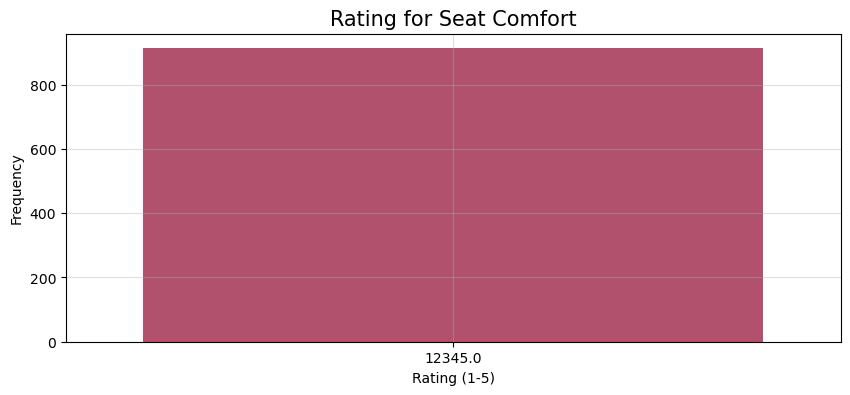

In [15]:
# distribution of the rating for seat comfort
plt.figure(figsize=(10,4))
sns.countplot(data=df, x=df['SeatComfort'], palette='flare')
plt.xlabel('Rating (1-5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.title('Rating for Seat Comfort', fontsize=15)
plt.show()

In [16]:
print(df['SeatComfort'].unique())  # Check unique values
print(df['SeatComfort'].describe())  # Check summary statistics


[12345.    nan]
count      913.0
mean     12345.0
std          0.0
min      12345.0
25%      12345.0
50%      12345.0
75%      12345.0
max      12345.0
Name: SeatComfort, dtype: float64


In [17]:
print(df['SeatComfort'].value_counts())


SeatComfort
12345.0    913
Name: count, dtype: int64


In [18]:
import numpy as np

# Replace invalid values with NaN
df['SeatComfort'] = df['SeatComfort'].replace(12345, np.nan)

# Drop rows with NaN values in the SeatComfort column
df_cleaned = df.dropna(subset=['SeatComfort'])


In [19]:
df_cleaned['SeatComfort'] = df_cleaned['SeatComfort'].astype(int)


In [20]:
df_cleaned = df_cleaned[(df_cleaned['SeatComfort'] >= 1) & (df_cleaned['SeatComfort'] <= 5)]


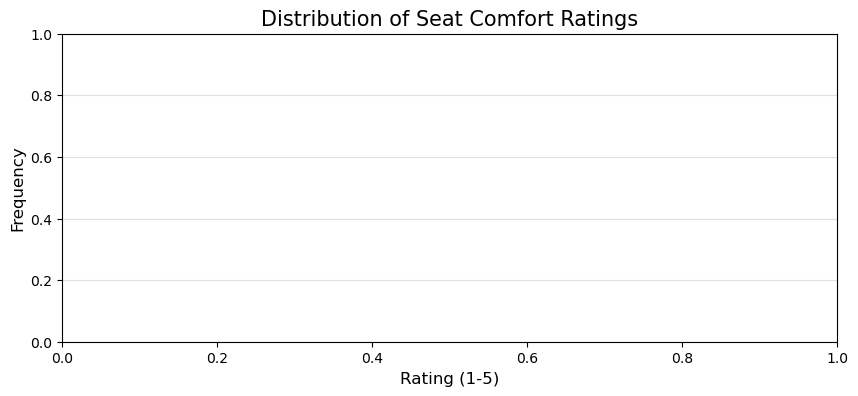

In [21]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_cleaned, x='SeatComfort', palette='flare')
plt.xlabel('Rating (1-5)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Seat Comfort Ratings', fontsize=15)
plt.grid(axis='y', alpha=0.4)
plt.show()


# Rating for Cabin Staff Service

C:\Users\LAPTOP HUB\AppData\Local\Temp\ipykernel_15792\3561131751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['CabinStaffService'], palette='flare')


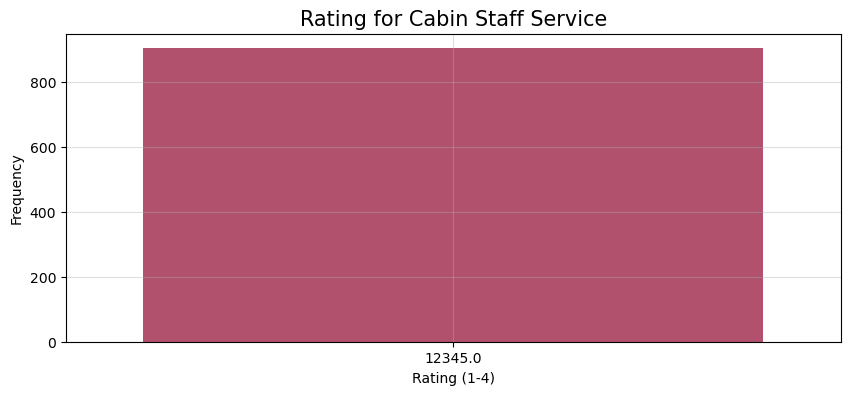

In [23]:
# distribution of the rating for cabin staff service
plt.figure(figsize=(10,4))
sns.countplot(data=df, x=df['CabinStaffService'], palette='flare')
plt.xlabel('Rating (1-4)')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.title('Rating for Cabin Staff Service', fontsize=15)
plt.show()

# the rating for ground service

C:\Users\LAPTOP HUB\AppData\Local\Temp\ipykernel_15792\3907518732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['GroundService'], palette='flare')


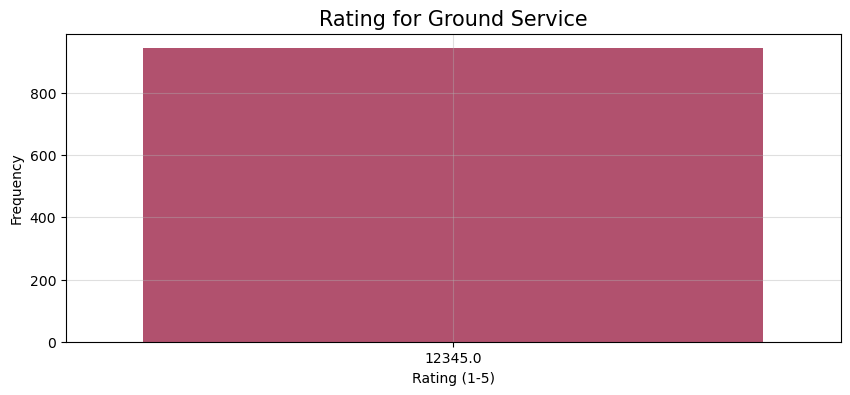

In [25]:
# distribution of the rating for ground service
plt.figure(figsize=(10,4))
sns.countplot(data=df, x=df['GroundService'], palette='flare')
plt.xlabel('Rating (1-5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.title('Rating for Ground Service', fontsize=15)
plt.show()

# Rating for the Value for Money

C:\Users\LAPTOP HUB\AppData\Local\Temp\ipykernel_15792\3869467698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['ValueForMoney'], palette='flare')


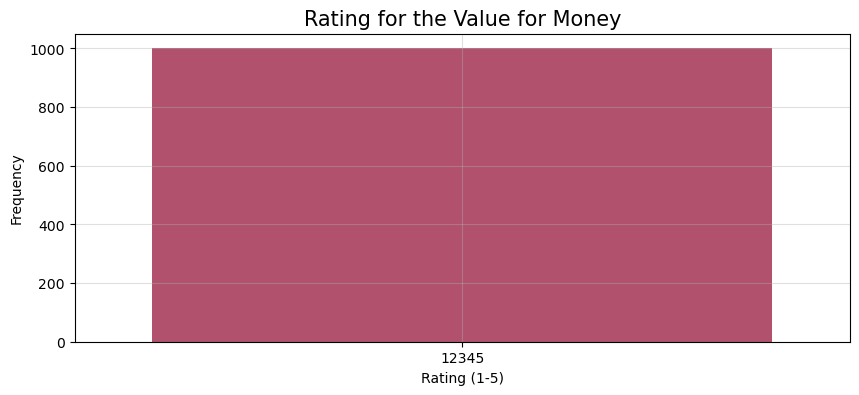

In [27]:
# distribution of the rating for the value for money
plt.figure(figsize=(10,4))
sns.countplot(data=df, x=df['ValueForMoney'], palette='flare')
plt.xlabel('Rating (1-5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.title('Rating for the Value for Money', fontsize=15)
plt.show()

# Customer Reviews Analysis

# Proportion of Recommended vs No Recommended

In [30]:
# install pywaffle library to the working environment
# documentation: https://pywaffle.readthedocs.io/en/latest/index.html
!pip install pywaffle

In [31]:
df=pd.read_csv("airline_reviews.csv")

In [32]:
df['Recommended']  # Check unique values

0       no
1       no
2       no
3       no
4       no
      ... 
995    yes
996     no
997     no
998     no
999     no
Name: Recommended, Length: 1000, dtype: object

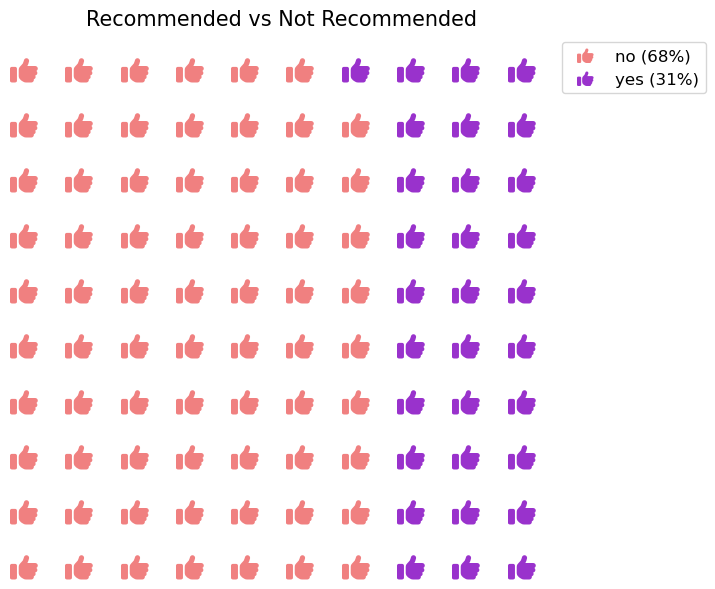

In [33]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

# Count the "Yes" and "No" values in the Recommended column
recommendation = df['Recommended'].value_counts()

# Calculate percentages
percentage = (recommendation.values / recommendation.sum()) * 100

# Create the waffle chart
figure = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=dict(zip(recommendation.index, percentage)),
    colors=['lightcoral', 'darkorchid'],  # Customize as needed
    icons='thumbs-up',  # Single icon style
    font_size=20,
    figsize=(12, 6),
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': [f"{label} ({int(value)}%)" for label, value in zip(recommendation.index, percentage)],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1),
        'fontsize': 12
    }
)

plt.title('Recommended vs Not Recommended', fontsize=15)
plt.savefig('source.png',dpi=100)
plt.show()


In [34]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [35]:
import sklearn
print(sklearn.__version__)

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


1.5.1


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import re
import scipy
import sklearn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Example function to preprocess review text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Apply the function to the 'ReviewBody' column
df['processed_reviewBody'] = df['ReviewBody'].apply(preprocess_text)


In [ ]:
recommend = df[df['Recommended']=='yes']['ReviewBody']
no_recommend = df[df['Recommended']=='no']['ReviewBody']


# Recommended vs No Recommended Review Text

In [ ]:
from wordcloud import WordCloud

# visualize the frequent words in 'recommend' and 'no recommend' review
# subset the data into 'recommend' and 'no_recommend' review
recommend = df[df['Recommended']=='yes']['processed_reviewBody']
no_recommend = df[df['Recommended']=='no']['processed_reviewBody']


combined_recommended = ' '.join(recommend)
combined_norecommended = ' '.join(no_recommend)


# create a word cloud using the combined text
wordcloud_recommend = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='flare').generate(combined_recommended)

wordcloud_norecommend = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='plasma').generate(combined_norecommended)
 
# plot the WordCloud image
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_recommend)
axes[0].axis('off')
axes[0].set_title('Recommended Review', fontsize=30)
axes[1].imshow(wordcloud_norecommend)
axes[1].axis('off')
axes[1].set_title('No Recommended Review', fontsize=30)
plt.tight_layout(pad=3)
plt.savefig('re vs non re.png',dpi=100)
plt.show()

# proportion of Verified and Unverified Review

In [ ]:
# proportion of the verified and unverified reviews in the dataset
verification = df['VerifiedReview'].value_counts()

plt.figure(figsize=(10,8))
plt.pie(verification.values, labels=['Unverified','Verified'], autopct='%.2f%%', explode=([0.05]*len(verification.index)), colors=['indigo','lightsalmon'])
plt.title('Verified vs Unverified Reviews', fontsize=15)
plt.savefig('ve and unve.png',dpi=100)
plt.show()


In [ ]:
# is there any difference in term of recommendation between verified and no verified reviews?
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, x=df['Recommended'], hue=df['VerifiedReview'].astype(str), palette='flare')
ax.legend(loc='upper right', bbox_to_anchor=[1.2,1])
plt.grid(alpha=0.4)
plt.title('Recommendation by Verified and Unverified Reviews', fontsize=15)
plt.savefig('Recommendation by Verified and Unverified Reviews.png',dpi=100)
plt.show()

# Negative Feedback Among Verified and Unverified Reviews

In [ ]:
# subset a'no_recommend' review from original dataset
no_recommend = df[df['Recommended']=='no']

# further classify the 'no_recommend' subset into different traveller type
verified = no_recommend[no_recommend['VerifiedReview']==True]['processed_reviewBody']
no_verified = no_recommend[no_recommend['VerifiedReview']==False]['processed_reviewBody']


# combine all processed review text into a single text corpus
combined_verified = ' '.join(verified)
combined_notverified = ' '.join(no_verified)

# create a word cloud using the combined text
wordcloud_verified = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='flare').generate(combined_verified)

wordcloud_notverified = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='plasma').generate(combined_notverified)

 
# plot the WordCloud image
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_verified)
axes[0].axis('off')
axes[0].set_title('Verified Review', fontsize=40)
axes[1].imshow(wordcloud_notverified)
axes[1].axis('off')
axes[1].set_title('No Verified Review', fontsize=40)
plt.tight_layout(pad=2)
plt.savefig('Verified and Unverified Reviews.png',dpi=100)
plt.show()

# Distribution of Customer by Traveller Type

In [ ]:
# what are the traveller type in the dataset?
traveller = df['TypeOfTraveller'].value_counts()

plt.figure(figsize=(12,5))
plt.barh(y=traveller.index, width=traveller.values, color=['indigo','darkorchid','lightcoral','lightsalmon'])
plt.xlabel('Frequency')

for index, values in enumerate(traveller):
    plt.text(values+5, index, str(values), va='center')


plt.title('Different Type of Traveller', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

In [ ]:
# exclude the unknown traveller type
data_copy = df[~df['TypeOfTraveller'].isna()]

plt.figure(figsize=(12,5))
ax = sns.countplot(data=data_copy, x=data_copy['Recommended'], hue=data_copy['TypeOfTraveller'], palette='flare')
ax.legend(loc='upper right', bbox_to_anchor=[1.2,1])
plt.grid(alpha=0.4)
plt.title('Recommendation Among Different Traveller Type', fontsize=15)
plt.savefig('Recommendation Among Different Traveller Type',dpi=100)
plt.show()

# Negative Feedback from Various Type of Traveller

In [ ]:
# lets understand the unstatisfaction in different type of traveller type

# further classify the 'no_recommend' subset into different traveller type
couple = no_recommend[no_recommend['TypeOfTraveller']=='Couple Leisure']['processed_reviewBody']
solo = no_recommend[no_recommend['TypeOfTraveller']=='Solo Leisure']['processed_reviewBody']
business = no_recommend[no_recommend['TypeOfTraveller']=='Business']['processed_reviewBody']
family = no_recommend[no_recommend['TypeOfTraveller']=='Family Leisure']['processed_reviewBody']

# combine all processed review text in each traveller type into a single text corpus
combined_couple = ' '.join(couple)
combined_solo = ' '.join(solo)
combined_business = ' '.join(business)
combined_family = ' '.join(family)


# create a word cloud using the combined text
wordcloud_couple = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='flare').generate(combined_couple)

wordcloud_solo = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='plasma').generate(combined_solo)

wordcloud_business = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='flare').generate(combined_business)

wordcloud_family = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='plasma').generate(combined_family)

 
# plot the WordCloud image
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_couple)
axes[0].axis('off')
axes[0].set_title('Couple Leisure', fontsize=40)
axes[1].imshow(wordcloud_solo)
axes[1].axis('off')
axes[1].set_title('Solo Leisure', fontsize=40)
plt.tight_layout(pad=2)
plt.show()

# plot the WordCloud image
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_business)
axes[0].axis('off')
axes[0].set_title('Business', fontsize=40)
axes[1].imshow(wordcloud_family)
axes[1].axis('off')
axes[1].set_title('Family Lesiure', fontsize=40)
plt.tight_layout(pad=2)
plt.savefig('unstatisfaction in different type of traveller type',dpi=100)
plt.show()

In [ ]:
#TextAnalysis | AirlineReviews

# Distribution of Customers Based on Seat Types

In [ ]:
# install the squarify library into the environment
!pip install squarify

# import squarify library (for plotting treemap)
import squarify

In [ ]:
# visualize the distribution of customer by the type of seat in treemap
# normalize the data
seats = df['SeatType'].value_counts()
total = df.shape[0]
normed_data = (seats.values / total) * 100

# create a treemap
plt.figure(figsize=(12,8))
squarify.plot(sizes=normed_data, label=seats.index, color=['lightcoral','lightsalmon','indigo','darkorchid'],pad=False)

# remove axis labels
plt.axis('off')

plt.title('Distribution of Customers by Seat Type', fontsize=15)
plt.savefig('Distribution of Customers by Seat Type',dpi=100)
plt.show()

In [ ]:
# is there any difference in term of recommendation between customer from various seat type?

# exclude the unknown traveller type
data_copy = df[~df['SeatType'].isna()]

plt.figure(figsize=(12,5))
ax = sns.countplot(data=data_copy, x=data_copy['Recommended'], hue=data_copy['SeatType'], palette='flare')
ax.legend(loc='upper right', bbox_to_anchor=[1.2,1])
plt.grid(alpha=0.4)
plt.title('Recommendation Among Customers in Different Seat Type', fontsize=15)
plt.savefig('Recommendation Among Customers in Different Seat Type',dpi=100)
plt.show()

# Customer Critique Across Various Seat Types

In [ ]:
# lets understand the unstatisfaction of customer in different category of seat type

# further classify the 'no_recommend' subset into different categories of seat type
economy = no_recommend[no_recommend['SeatType']=='Economy Class']['processed_reviewBody']
business = no_recommend[no_recommend['SeatType']=='Business Class']['processed_reviewBody']
premium = no_recommend[no_recommend['SeatType']=='Premium Economy']['processed_reviewBody']
first = no_recommend[no_recommend['SeatType']=='First Class']['processed_reviewBody']

# combine all processed review text in each traveller type into a single text corpus
# remove the word 'seat' from being generated in the word cloud
combined_economy = ' '.join(economy).replace('seat','')
combined_business = ' '.join(business).replace('seat','')
combined_premium = ' '.join(premium).replace('seat','')
combined_first = ' '.join(first).replace('seat','')


# create a word cloud using the combined text
wordcloud_economy = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='flare').generate(combined_economy)

wordcloud_business = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='plasma').generate(combined_business)

wordcloud_premium = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='flare').generate(combined_premium)

wordcloud_first = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10, colormap='plasma').generate(combined_first)

 
# plot the WordCloud image
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_economy)
axes[0].axis('off')
axes[0].set_title('Economy Class', fontsize=40)
axes[1].imshow(wordcloud_business)
axes[1].axis('off')
axes[1].set_title('Business Class', fontsize=40)
plt.tight_layout(pad=2)
plt.show()

# plot the WordCloud image
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_premium)
axes[0].axis('off')
axes[0].set_title('Premium Economy', fontsize=40)
axes[1].imshow(wordcloud_first)
axes[1].axis('off')
axes[1].set_title('First Class', fontsize=40)
plt.tight_layout(pad=2)
plt.savefig('understand the unstatisfaction of customer in different category of seat type',dpi=100)
plt.show()

 # Predictive Modelling

# Data Preprocessing for Model Training

In [ ]:
# can we predict whether the customer will recommend the airline based on their review?
# create a subset of data only contains attributes 'ReviewBody' & 'Recommended'
data_model = df.copy()
data_model = data_model[['ReviewBody','Recommended']]

In [ ]:
# install SpaCy for performing text classification
!pip install spacy
# download a language model in SpaCy
!python -m spacy download en_core_web_lg
# load SpaCy libraries and the language model
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
# conda create -n myenv python=3.9
# conda activate myenv
# pip install spacy
# python -m spacy download en_core_web_lg


In [ ]:
# process the text into vector (the vector size is 300)
# this is done by using the word vectors from a large SpaCy model for text embedding
data_model['textVector'] = data_model['ReviewBody'].apply(lambda x: nlp(x).vector)

In [ ]:
# the column title and text (textVector will be used instead) will not use in this analysis
data_copy = data_model.copy()
data_copy.drop(columns=['ReviewBody'], axis=1, inplace=True)

# split the dataset into training and test datasets
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_copy, test_size=0.2, random_state=122)

# check the dimension of the train and test data
print('Dimension of training data: ', train.shape)
print('Dimension of test dat: ', test.shape)

In [ ]:
# segregate the feature and label of the train and test data
Xtrain = train['textVector']
ytrain = train['Recommended']

Xtest = test['textVector']
ytest = test['Recommended']

In [ ]:
# encode the label into numeric data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

In [ ]:
# convert the Xtrain and Xtest data into 2D numpy array
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

Xtrain_2d = np.stack(Xtrain)
Xtest_2d = np.stack(Xtest)

In [ ]:
# scale the feature vector 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_2d)
Xtest_scaled = scaler.transform(Xtest_2d)

# Model Training

In [ ]:
from sklearn.naive_bayes import ComplementNB

# instantiate a ComplementNB() class
clf = ComplementNB()

# fit the model with training data
cNB = clf.fit(Xtrain_scaled, ytrain_encoded)

# Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

ypred = cNB.predict(Xtest_scaled)

# confusion matrix
confusionMatrix = confusion_matrix(ytest_encoded,ypred, normalize='true')

# visualize the confusion matrix in a heatmap
plt.figure()
sns.heatmap(confusionMatrix, annot=True, cmap='BuPu', fmt='.4g')

plt.show()

# classification report
report = classification_report(ytest_encoded, ypred)
print(report)

In [ ]:
# plot the ROC curve
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

display = RocCurveDisplay.from_estimator(cNB, Xtest_scaled, ytest_encoded, name='Naive Bayes')
plt.show()


In [ ]:
# precision-recall curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(cNB, Xtest_scaled, ytest_encoded, name='Naive Bayes')
plt.show()